<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework3Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
from sklearn.naive_bayes import GaussianNB

# load the dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA feature extraction
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Naïve Bayes classifier
num_pcs = X_train_pca.shape[1]
accuracies = []
precisions = []
recalls = []
cms = []

for i in range(1, num_pcs+1):
    X_train_pca_i = X_train_pca[:,:i]
    X_test_pca_i = X_test_pca[:,:i]

    nb = GaussianNB()
    nb.fit(X_train_pca_i, y_train)
    y_pred = nb.predict(X_test_pca_i)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

# Print results
print(f"Accuracy scores: {accuracies}")
print(f"Precision scores: {precisions}")
print(f"Recall scores: {recalls}")
print(f'Confusion Matrix:\n{cms}')


Accuracy scores: [0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.868421052631579, 0.8596491228070176, 0.8421052631578947, 0.8333333333333334, 0.8421052631578947, 0.8508771929824561, 0.868421052631579, 0.868421052631579]
Precision scores: [0.9090909090909091, 0.9333333333333333, 0.9333333333333333, 0.9324324324324325, 0.9452054794520548, 0.9452054794520548, 0.9066666666666666, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9210526315789473, 0.9210526315789473, 0.918918918918919, 0.918918918918919, 0.8947368421052632, 0.8933333333333333, 0.890410

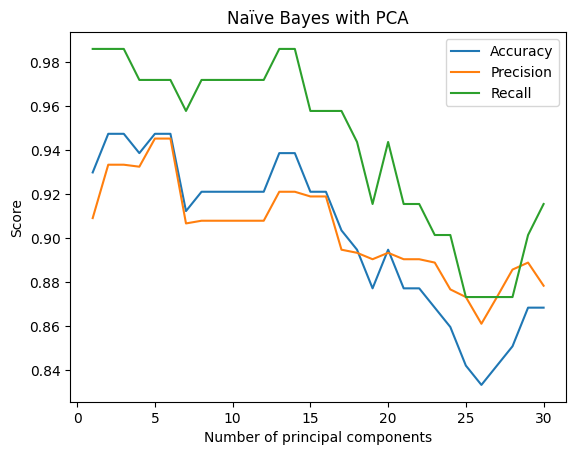

Optimal number of principal components: 2


In [11]:
# Plot results
plt.plot(range(1, num_pcs+1), accuracies, label='Accuracy')
plt.plot(range(1, num_pcs+1), precisions, label='Precision')
plt.plot(range(1, num_pcs+1), recalls, label='Recall')
plt.xlabel('Number of principal components')
plt.ylabel('Score')
plt.title('Naïve Bayes with PCA')
plt.legend()
plt.show()

# Identify optimum number of principal components
optimal_num_pcs = np.argmax(accuracies) + 1
print(f'Optimal number of principal components: {optimal_num_pcs}')
